In [30]:
import pandas as pd               #data loading and manipulation
import numpy as np
diabetes = pd.read_csv("diabetes.csv")
diabetes.info()
diabetes.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
#diabetes["diabetes"] = diabetes["diabetes"].map({"neg":0, "pos":1})
diabetes.head()
diabetes.describe()
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diabetes, test_size = 0.20, random_state = 42)



In [61]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',  'DiabetesPedigreeFunction' , 'Age']
X = diabetes[feature_cols] # Features
y = diabetes.Outcome # Target variable

In [62]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]], dtype=int64)

In [68]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

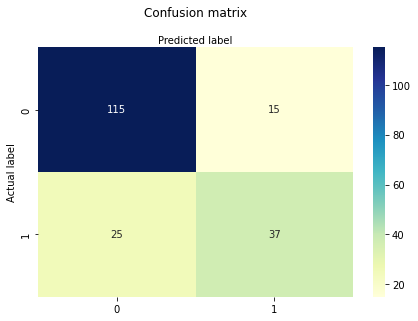

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7115384615384616
Recall: 0.5967741935483871


In [66]:
logreg.score(X_test, y_test)

0.7916666666666666

In [67]:
logreg.score(X_train, y_train)

0.7708333333333334

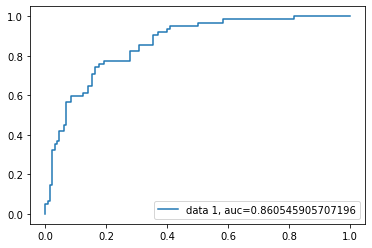

In [71]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#statsmodels.formula.api method

In [28]:
#diabetes["diabetes"] = diabetes["diabetes"].map({"neg":0, "pos":1})
diabetes.head()
diabetes.describe()
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diabetes, test_size = 0.50, random_state = 42)

In [52]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1


In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as smf
from statsmodels.formula.api import logit 

In [53]:
formula = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age'

In [54]:
model = smf.logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.2752
Time:                        19:38:42   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.0359      0.837    -10.802      0.000     -10.675      -7.396
Pregnancies                  0.0645      0.036      1.791      0.073      -0.006       0.135
Glucose                      0.0341      0.004      8.055      0.000       0.026       0.042
BloodPressure               -0.0139      0.006     -2.260      0.024      -0.026      -0.002
SkinThickness                0.0031      0.008      0.397      0.691      -0.012       0.019
Insulin                     -0.0018      0.001     -1.782      0.075      -0.004       0.000
BMI                          0.1026      0.017      5.948      0.000       0.069       0.136
DiabetesPedigreeFunction     0.6945      0.330      2.107      0.035       0.049       1.341
Age                          0.0371      0.011      3.400      0.001       0.016       0.058
============================================================================================
"""

In [57]:
# Odds Ratio
print(np.exp(model.params))

Intercept                   0.000119
Pregnancies                 1.066675
Glucose                     1.034695
BloodPressure               0.986207
SkinThickness               1.003154
Insulin                     0.998185
BMI                         1.108059
DiabetesPedigreeFunction    2.002724
Age                         1.037783
dtype: float64


In [99]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

In [100]:
prediction = model.predict(exog = test_data)

In [108]:
cutoff = 0.7
y_prediction = np.where(prediction > cutoff, 1,0)

In [109]:
y_actual = test_data["Outcome"]

In [110]:
conf_matrix = pd.crosstab(y_actual, y_prediction, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

In [111]:
print(conf_matrix)

Predicted    0   1  All
Actual                 
0           93   6   99
1           28  27   55
All        121  33  154


In [112]:
accuracy = accuracy_score(y_actual, y_prediction)

In [113]:
print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.78%


In [114]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        99
           1       0.82      0.49      0.61        55

    accuracy                           0.78       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.79      0.78      0.76       154

